In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical



import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random


In [ ]:
! pip3 install  tensorflow --user



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\harsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
dirtrain=r'C:\Users\harsh\OneDrive\Desktop\Project1\train'
dirtest=r'C:\Users\harsh\OneDrive\Desktop\Project1\test'
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]


(256, 256, 3)


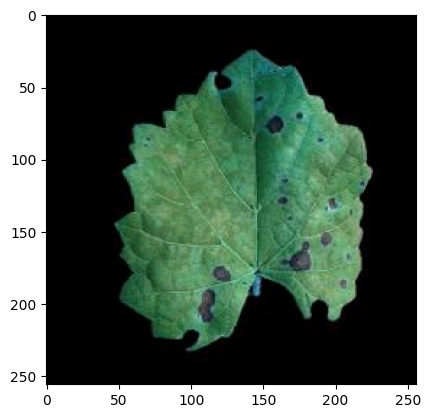

In [4]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break


In [5]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()


In [6]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()


In [7]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)



3209
[966, 1154, 213, 876]
880
[210, 240, 220, 210]


In [8]:
random.shuffle(training_data)
random.shuffle(testing_data)




x_train = []
y_train = []
x_test = []
y_test = []


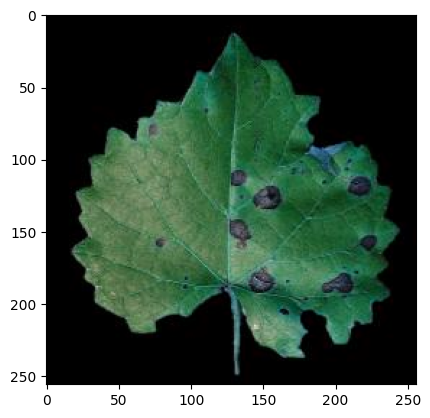

In [9]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')


In [10]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)


In [11]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)


In [12]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train
x_train.shape


(3209, 256, 256, 3)

In [13]:
#K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [15]:
y_train_cat=to_categorical(y_train,4)
y_test_cat=to_categorical(y_test,4)
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

model.save("leaf_disease_coloured.h5")


Epoch 1/10
86/86 [==============================] - 239s 3s/step - loss: 2.8173 - accuracy: 0.4635 - val_loss: 2.0839 - val_accuracy: 0.4046
Epoch 2/10
86/86 [==============================] - 226s 3s/step - loss: 0.8946 - accuracy: 0.6238 - val_loss: 0.9532 - val_accuracy: 0.5726
Epoch 3/10
86/86 [==============================] - 226s 3s/step - loss: 0.5231 - accuracy: 0.7778 - val_loss: 0.4121 - val_accuracy: 0.8071
Epoch 4/10
86/86 [==============================] - 228s 3s/step - loss: 0.3540 - accuracy: 0.8687 - val_loss: 0.5104 - val_accuracy: 0.7925
Epoch 5/10
86/86 [==============================] - 225s 3s/step - loss: 0.2840 - accuracy: 0.9047 - val_loss: 0.2463 - val_accuracy: 0.8983
Epoch 6/10
86/86 [==============================] - 225s 3s/step - loss: 0.1828 - accuracy: 0.9377 - val_loss: 0.1745 - val_accuracy: 0.9295
Epoch 7/10
86/86 [==============================] - 217s 3s/step - loss: 0.1303 - accuracy: 0.9523 - val_loss: 0.3448 - val_accuracy: 0.8817
Epoch 8/10
86

In [16]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")


In [17]:
d=r'C:\Users\harsh\OneDrive\Desktop\Project1\1b3c8d82-8471-4b90-955e-69a487f135ae___FAM_B.Msls 0835_final_masked.jpg'
img=cv2.imread(d)
#plt.imshow(img)

img=img.reshape(-1,256,256,3)
predict_x=new_model.predict(img) 
predict_x
categories[np.argmax(predict_x[0])], str(round(np.max(predict_x[0])*100, 2))
#classes_x=np.argmax(predict_x,axis=1)
#classes_x[0]
#categories[classes_x[0]]

1/1 [==============================] - 0s 222ms/step


('Esca_(Black_Measles)', '82.61')

In [18]:
img=img.reshape(-1,256,256,3)


y_predict = np.argmax(model.predict(x_test), axis=-1)
y_predict
#predict_x=model.predict(img) 
#classes_x=np.argmax(predict_x,axis=1)
#classes_x
#predict_class=new_model.predict_class(img)
#predict_class

#categories[predict_class[0]]

28/28 [==============================] - 18s 654ms/step


array([0, 2, 2, 1, 3, 1, 1, 0, 1, 2, 1, 1, 2, 3, 1, 0, 3, 2, 1, 3, 3, 2,
       3, 3, 2, 1, 2, 1, 3, 1, 0, 0, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 1, 2,
       1, 3, 2, 0, 0, 2, 3, 3, 0, 0, 2, 3, 2, 2, 0, 0, 1, 3, 3, 1, 0, 2,
       2, 0, 0, 3, 1, 3, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1,
       3, 1, 0, 0, 0, 2, 0, 1, 1, 3, 3, 1, 0, 1, 3, 2, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 3, 0, 3, 3, 0, 0,
       2, 1, 3, 0, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 2, 3, 1,
       0, 3, 2, 3, 3, 1, 2, 2, 2, 0, 3, 1, 3, 0, 2, 0, 1, 1, 3, 0, 0, 1,
       1, 3, 2, 3, 1, 2, 1, 0, 2, 1, 1, 2, 1, 3, 2, 0, 3, 2, 3, 2, 3, 0,
       0, 2, 0, 0, 2, 1, 3, 1, 2, 1, 3, 0, 1, 3, 1, 2, 0, 3, 0, 0, 3, 1,
       2, 0, 3, 3, 0, 3, 0, 2, 0, 3, 3, 1, 1, 1, 0, 0, 3, 0, 0, 2, 0, 3,
       0, 0, 3, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 3, 0, 3, 3, 0, 1, 2, 3,
       1, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0, 2, 3, 3, 2, 1, 1, 1, 3, 1, 0, 3,
       3, 1, 0, 3, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3,